In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("BA_reviews.csv")
df.head()

,Unnamed: 0,test_subheader,ratings,reviews
0,0,\n\nAbs Ahmed (United Kingdom) 16th February 2023,8,✅ Trip Verified | This was my first time flyin...
1,1,\n\nArsham Parsi (Canada) 15th February 2023,1,✅ Trip Verified | Lots of cancellations and d...
2,2,\n\nKeat Tan (United Kingdom) 7th February 2023,9,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...
3,3,\n\nAdam Churchill (Spain) 6th February 2023,10,✅ Trip Verified | Not only my first flight in...
4,4,\n\nMaria del Carmen Riesco Martin (United Kin...,10,✅ Trip Verified | My husband and myself were ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2500 non-null   int64 
 1   test_subheader  2500 non-null   object
 2   ratings         2500 non-null   int64 
 3   reviews         2500 non-null   object
dtypes: int64(2), object(2)
memory usage: 78.2+ KB


In [4]:
#Retreiving year and month of the review
from datetime import datetime
new = df["test_subheader"].str.split(r'[()]', expand = True)

date = pd.Series(new[2]) #Converting date to series to use str attribute
date_clean = date.str.replace("th","").replace("st", "").replace("nd", "").replace("rd", "")
date_df = date_clean.str.split(r' ', expand = True)

df["month"] = date_df[2]
df["year"] = date_df[3]
df = df[["month", "year", "ratings", "reviews"]]
df
#df["date"] = pd.to_datetime(date_clean, format="%d %b %Y")

,month,year,ratings,reviews
0,February,2023,8,✅ Trip Verified | This was my first time flyin...
1,February,2023,1,✅ Trip Verified | Lots of cancellations and d...
2,February,2023,9,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...
3,February,2023,10,✅ Trip Verified | Not only my first flight in...
4,February,2023,10,✅ Trip Verified | My husband and myself were ...
...,...,...,...,...
2495,September,2015,9,This aging British Airways Boeing 747-400 appe...
2496,September,2015,1,I am so upset with British Airways that I will...
2497,September,2015,10,Booked my flight to Madrid and back on British...
2498,September,2015,4,Whilst I don't expect too much from economy I ...


In [5]:
#Cleaning
new = date = date_clean = date_df = None

#General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    2500 non-null   object
 1   year     2500 non-null   object
 2   ratings  2500 non-null   int64 
 3   reviews  2500 non-null   object
dtypes: int64(1), object(3)
memory usage: 78.2+ KB


In [6]:
#Changing types to int for columns year and ratings
df['ratings'] = df['ratings'].astype('int')
df['year'] = df['year'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    2500 non-null   object
 1   year     2500 non-null   int64 
 2   ratings  2500 non-null   int64 
 3   reviews  2500 non-null   object
dtypes: int64(2), object(2)
memory usage: 78.2+ KB


<AxesSubplot:>

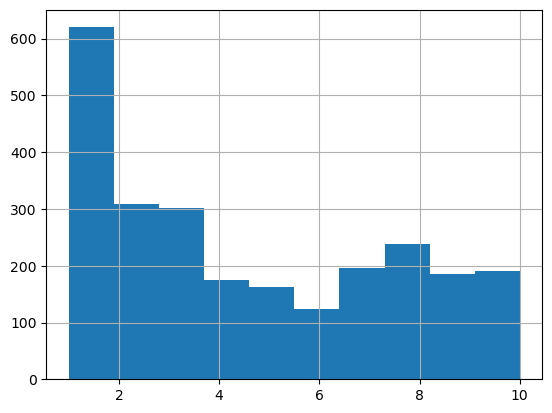

In [7]:
df["ratings"].hist()

In [8]:
#Removing Verification info
review_n = []
for review in df['reviews']:
    if review[0] == "N":
        review_n.append(review[15:])
    else:
        review_n.append(review[18:])
        
df['reviews'] = pd.DataFrame(review_n)
df.head()

,month,year,ratings,reviews
0,February,2023,8,This was my first time flying with BA & I was ...
1,February,2023,1,Lots of cancellations and delays and no one a...
2,February,2023,9,BA 242 on the 6/2/23. Boarding was delayed due...
3,February,2023,10,"Not only my first flight in 17 years, but als..."
4,February,2023,10,My husband and myself were flying to Madrid o...


In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wiktoriatwarog/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wiktoriatwarog/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# clean the review column by removing the stopwords

stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview
 
df['reviews']=df['reviews'].apply(clean_review)

In [11]:
df['reviews'].head()

0    This first time flying BA & I pleasantly surpr...
1    Lots cancellations delays one apologized. Edin...
2    BA 242 6/2/23. Boarding delayed due late arriv...
3    Not first flight 17 years, also first time bac...
4    My husband flying Madrid 3rd February Legal ma...
Name: reviews, dtype: object

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [13]:

sent_all = []
for review in df['reviews']:
    sent = sentiment.polarity_scores(review)
    sent_all.append(sent)

In [14]:
sent_df = pd.DataFrame(sent_all, columns=["neg", "neu", "pos", "compound"])
df["neg_sent"] = sent_df["neg"]
df["neu_sent"] = sent_df["neu"]
df["pos_sent"] = sent_df["pos"]
df["compound_sent"] = sent_df["compound"]

In [15]:
df.head()

,month,year,ratings,reviews,neg_sent,neu_sent,pos_sent,compound_sent
0,February,2023,8,This first time flying BA & I pleasantly surpr...,0.027,0.588,0.385,0.9810
1,February,2023,1,Lots cancellations delays one apologized. Edin...,0.106,0.716,0.178,0.4019
2,February,2023,9,BA 242 6/2/23. Boarding delayed due late arriv...,0.045,0.521,0.434,0.9545
3,February,2023,10,"Not first flight 17 years, also first time bac...",0.024,0.768,0.207,0.9840
4,February,2023,10,My husband flying Madrid 3rd February Legal ma...,0.063,0.714,0.223,0.9758


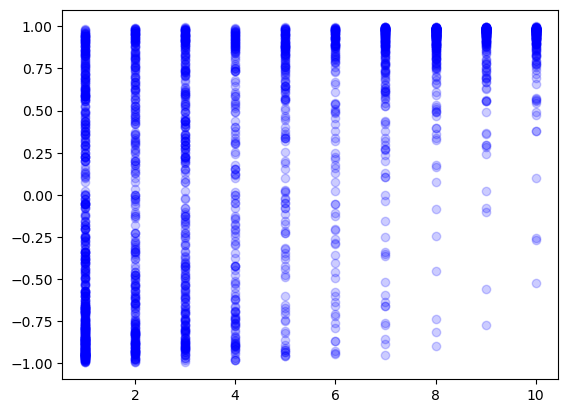

In [16]:
import matplotlib.pyplot as plt

plt.scatter(df["ratings"], df["compound_sent"], c="b", alpha=0.2)

plt.show()

<AxesSubplot:>

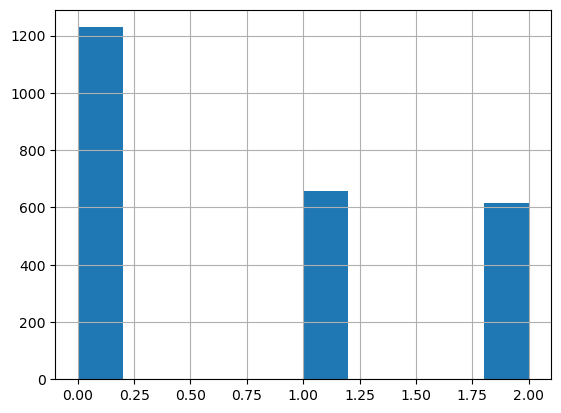

In [17]:
#Adding column to keep original ratings
df["ratings_original"] = df["ratings"]

#Dividing ratings into three groups: 
#0 - negative ratings (1-3 stars out of 10)
#1 - neutral ratings (4-7 stars out of 10)
#2 - positive ratings (8-10 stars out of 10)

df.loc[df['ratings']<=3, ['ratings']] = 0
df.loc[(df['ratings']<8) & (df['ratings']>3),['ratings']] = 1
df.loc[df['ratings']>=8,['ratings']] = 2

df["ratings"].hist()

In [18]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [36]:
stopwords = ("flight", "British","BA", "The", "Airways","Airway", "London", "I", "It")

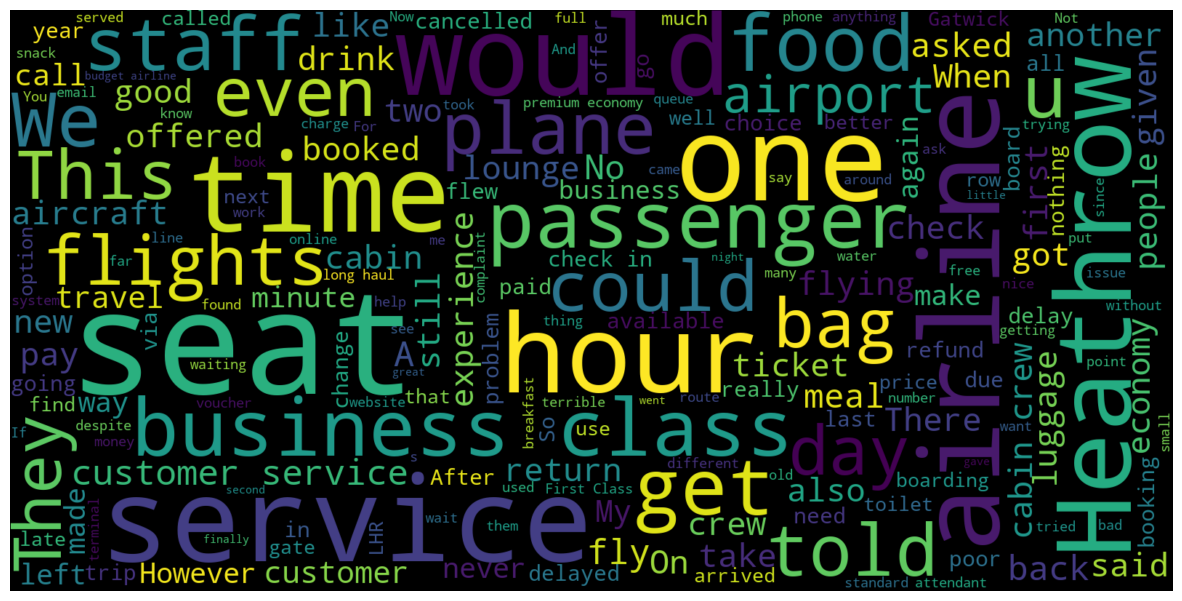

In [37]:
#the Wordcloud of all the words with rating = 0 (negative)

consolidated=' '.join(word for word in df['reviews'][df['ratings']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=200, stopwords=stopwords)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

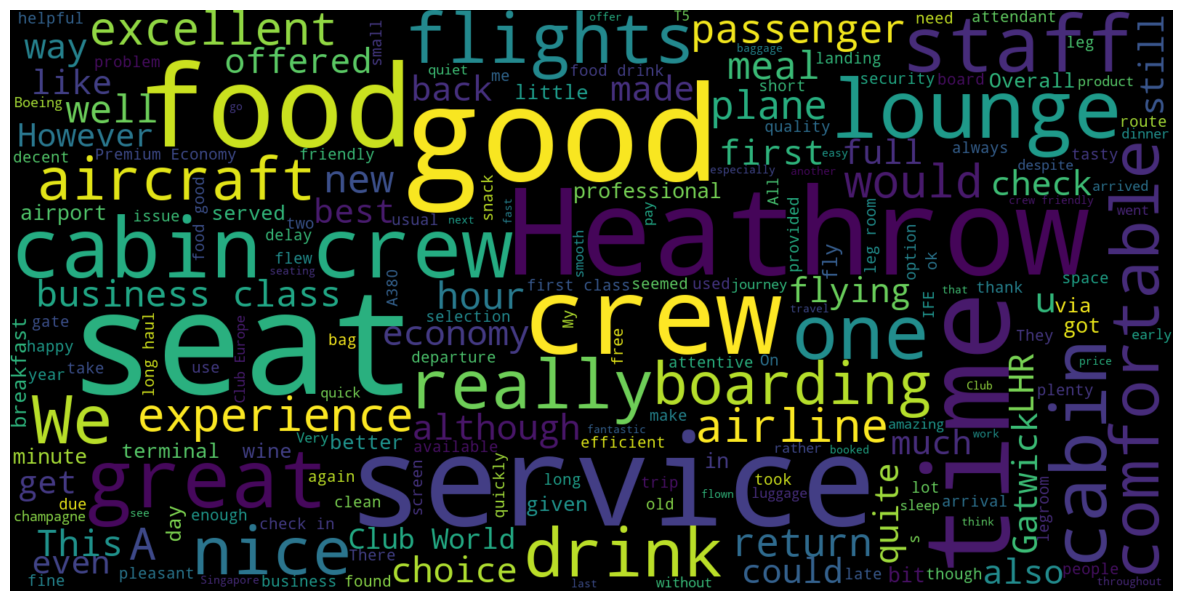

In [38]:
#the Wordcloud of all the words with rating = 2 (positive)

consolidated=' '.join(word for word in df['reviews'][df['ratings']==2].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=200, stopwords=stopwords)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [49]:
#Checking mean rating for each year

year_mean = df.groupby(["year"])["ratings_original"].mean()
year_mean

year
2015    5.213710
2016    4.985965
2017    3.847902
2018    4.317901
2019    4.764045
2020    4.336538
2021    4.298851
2022    3.995305
2023    5.384615
Name: ratings_original, dtype: float64

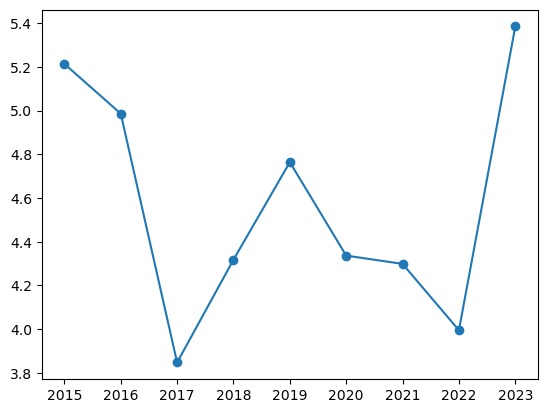

In [55]:
plt.plot(year_mean.index, year_mean, '-o')